In [1]:
# Import useful libraries
import gdeltxp
import gdeltviz
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from datetime import datetime
from collections import Counter, OrderedDict
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

In [31]:
all_events = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)
all_mentions = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_mentions.csv', encoding='latin-1').sort_values('EventTimeDate', ascending=1)

In [19]:
event_labels = ['Ceasefire Campaign', 'Final Agreements', 'National Referendum',
               'Re-Negotiations', 'Revised Agreements', 'Congress Approval']
event_periods = [[20160911000000, 20160925000000], [20160920000000, 20160930000000],
                [20161001000000, 20161003000000], [20161004000000, 20161125000000],
                [20161120000000, 20161130000000], [20161127000000, 20161203000000]]

In [69]:
def avg_event_tone(start, end):
    return np.array(all_mentions.loc[(all_mentions['EventTimeDate'] >= start) & (all_mentions['EventTimeDate'] <= end)].MentionDocTone).mean()

def avg_event_stability(start, end):
    return np.array(all_events.loc[(all_events['SQLDATE'] >= int(start/10e5)) & (all_events['SQLDATE'] <= int(end/10e5))].GoldsteinScale).mean()

def std_event_tone(start, end):
    return np.array(all_mentions.loc[(all_mentions['EventTimeDate'] >= start) & (all_mentions['EventTimeDate'] <= end)].MentionDocTone).std()

def std_event_stability(start, end):
    return np.array(all_events.loc[(all_events['SQLDATE'] >= int(start/10e5)) & (all_events['SQLDATE'] <= int(end/10e5))].GoldsteinScale).std()

In [75]:
event_tone_means = []
event_tone_stds = []
event_stability_means = []
event_stability_stds = []
for event in event_periods:
    event_tone_means.append(avg_event_tone(event[0], event[1]))
    event_tone_stds.append(std_event_tone(event[0], event[1]))
    event_stability_means.append(avg_event_stability(event[0], event[1]))
    event_stability_stds.append(std_event_stability(event[0], event[1]))
#print(event_tone_means, event_tone_stds)
#print(event_stability_means, event_stability_stds)

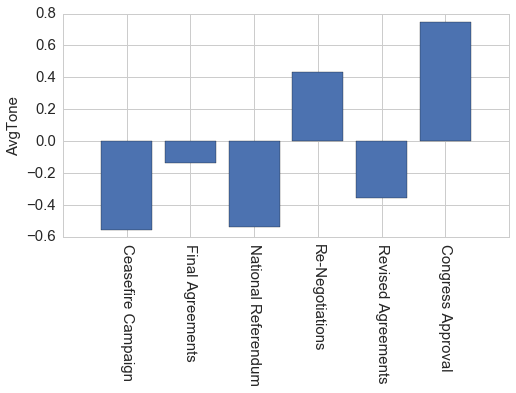

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('AvgTone' , fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.bar(np.arange(len(event_labels)), event_tones, align='center')
ax.set_xticks(np.arange(0, len(event_labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(event_labels)])
ax.set_xticklabels(event_labels[::1])
plt.xlim([-1,len(event_tones)])
plt.show()

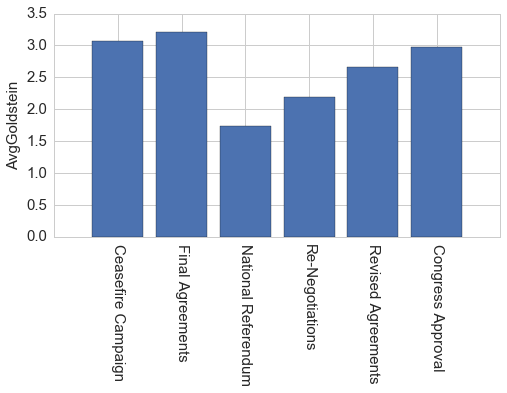

In [78]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('AvgGoldstein' , fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.bar(np.arange(len(event_labels)), event_stability, align='center')
ax.set_xticks(np.arange(0, len(event_labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(event_labels)])
ax.set_xticklabels(event_labels[::1])
plt.xlim([-1,len(event_stability)])
plt.show()

### TODO: Plot Standard Deviation
https://matplotlib.org/examples/api/barchart_demo.html

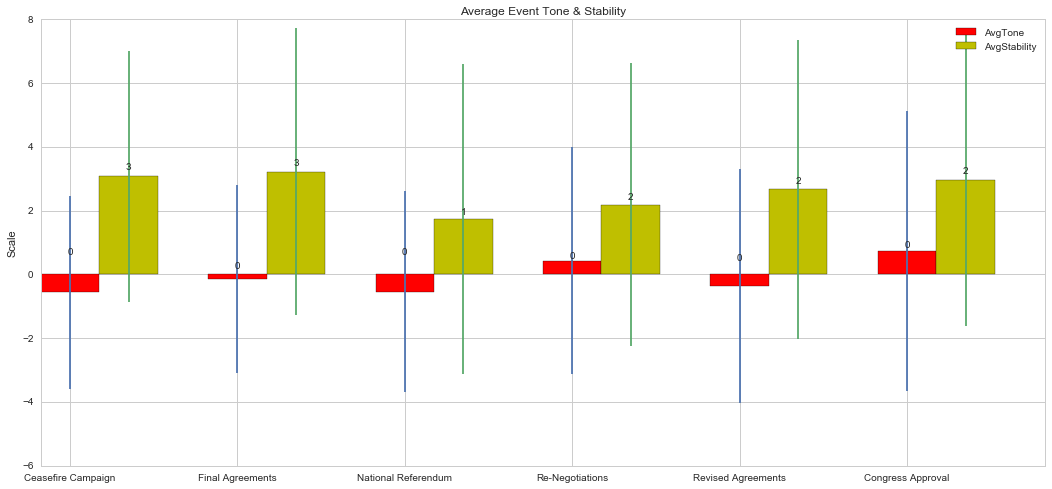

In [81]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = len(event_tone_means)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(ind, event_tone_means, width, color='r', yerr=event_tone_stds)

rects2 = ax.bar(ind + width, event_stability_means, width, color='y', yerr=event_stability_stds)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scale')
ax.set_title('Average Event Tone & Stability')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(event_labels)

ax.legend((rects1[0], rects2[0]), ('AvgTone', 'AvgStability'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()